# COVID-19 face mask detector with CNN, OpenCV

### 참고(References)
* Keras ImageDataGenerator and Data Augmentation :
    * https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
* Read a video and access a webcam with OpenCV in Python :
    * http://datahacker.rs/001-how-to-read-a-video-and-access-a-webcam-with-opencv-in-python/
* How to do Hyper-parameters search with Bayesian optimization for Keras model
    * https://www.dlology.com/blog/how-to-do-hyperparameter-search-with-baysian-optimization-for-keras-model/

### library
##### imutils
* OpenCV와 Python 2.7 및 Python 3 모두에서 변환, 회전, 크기 조정, 골격화 및 Matplotlib 이미지 표시와 같은 기본 이미지 처리 기능을 더 쉽게 만드는 일련의 편의 기능.

In [42]:
# !pip install opencv-python
# !pip install tensorflow
# !pip install keras
# !pip install pytesseract
# !pip install imutils
# !pip install bayesian-optimization
!pip install pygame

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/a6/4f/1cf0af568631286ab35cc8c7dfb3ab0383061c1591ef83ad2bfd9ed3bf82/pygame-2.5.1-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.6 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.6 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.6 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 8.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.6 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.6 MB 7.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/10.6 MB 7.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.6/10.6 MB 8.4 MB/s eta 0:00:01
   -------------- ---------------

In [1]:
import cv2,os
import numpy as np
from tensorflow.python.keras.utils import np_utils
import imutils
import pytesseract
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [2]:
np.__version__

'1.23.5'

In [3]:
cv2.__version__

'4.8.0'

In [4]:
tf.__version__

'2.13.0'

In [5]:
keras.__version__

'2.13.1'

#### 데이터 라벨 만들기

In [6]:
data_path='../data/mask_data/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

In [7]:
label_dict

{'without_mask': 0, 'with_mask': 1}

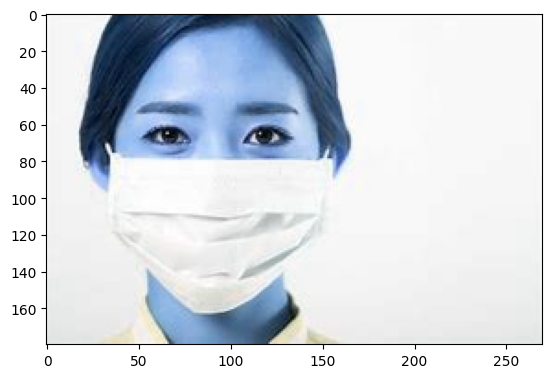

In [8]:
img = cv2.imread('../data/mask_data/with_mask/601-with-mask.jpg')
plt.imshow(img)

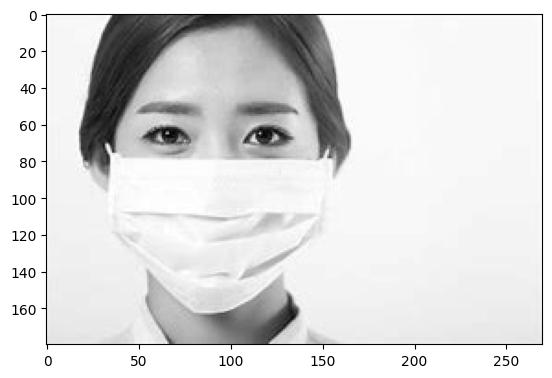

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

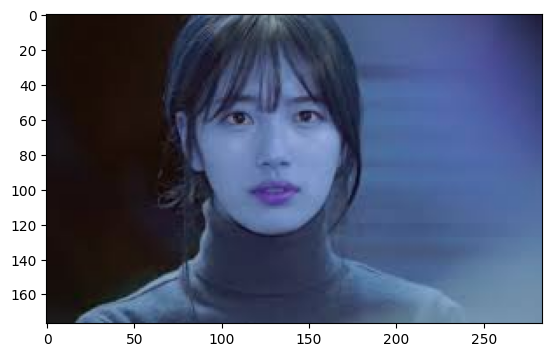

In [10]:
img = cv2.imread('../data/mask_data/without_mask/551.jpg')
plt.imshow(img)

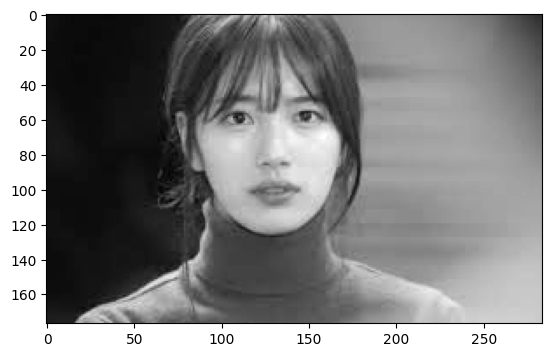

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

### #데이터 불러오기

In [12]:
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized=cv2.resize(gray,(100, 100))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:', e)

In [13]:
categories

['without_mask', 'with_mask']

In [14]:
folder_path

'../data/mask_data/with_mask'

In [15]:
img_names[:5]

['0-with-mask.jpg',
 '101-with-mask.jpg',
 '106-with-mask.jpg',
 '108-with-mask.jpg',
 '109-with-mask.jpg']

In [16]:
data[:3]

[array([[218, 215, 212, ..., 168, 155, 152],
        [215, 212, 204, ..., 189, 183, 159],
        [201, 198, 190, ..., 162, 167, 158],
        ...,
        [ 33,  53,  70, ...,  14,  14,  15],
        [ 31,  54,  77, ...,  19,  19,  17],
        [ 33,  56,  77, ...,  25,  27,  23]], dtype=uint8),
 array([[180, 173, 175, ..., 186, 163, 137],
        [178, 174, 175, ..., 174, 151, 135],
        [174, 178, 177, ..., 153, 134, 145],
        ...,
        [203, 201, 196, ..., 153, 152, 161],
        [201, 200, 195, ..., 159, 156, 159],
        [194, 196, 199, ..., 155, 166, 143]], dtype=uint8),
 array([[255, 255, 255, ..., 254, 254, 254],
        [255, 255, 255, ..., 254, 254, 254],
        [254, 254, 250, ..., 228, 218, 209],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]

In [17]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0], 100, 100, 1))
target=np.array(target)

new_target=np_utils.to_categorical(target)

np.save('data', data)
np.save('target', new_target)

In [18]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
data=np.load('data.npy')
target=np.load('target.npy')

In [20]:
data.shape

(615, 100, 100, 1)

In [21]:
target.shape

(615, 2)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.optimizer_v2 import rmsprop

### #학습용 데이터와 검증용 데이터 세트로 분할하기

In [23]:
train_data,test_data,train_target,test_target=train_test_split(data,target, test_size=0.2, random_state=42)

In [24]:
train_data.shape

(492, 100, 100, 1)

### *Data augmentation to improve generalization

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, 
                         zoom_range=0.2, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range=0.15, 
                         horizontal_flip=True,
                         fill_mode="nearest")

### *Hyperparameter Tuning With Bayesian Optimization

In [26]:
input_shape=data.shape[1:]
input_shape

(100, 100, 1)

In [27]:
def get_model(input_shape, dropout2_rate=0.5):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape,
                     name="conv2d_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv2d_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_1"))
    model.add(Dropout(0.25, name="dropout_1"))
    model.add(Flatten(name="flatten"))
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dropout(dropout2_rate, name="dropout_2"))
    model.add(Dense(2, activation='softmax', name="dense_2"))
    return model

In [28]:
def fit_with(input_shape, verbose, dropout2_rate, lr):

    model = get_model(input_shape, dropout2_rate)
    
    optimizer = 'rmsprop'
    #optimizer = rmsprop.RMSProp(learning_rate=lr)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    model.fit(train_data, train_target, epochs=10,
              batch_size=4, verbose=verbose)

    score = model.evaluate(test_data, test_target, steps=10, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return score[1]

In [29]:
from functools import partial

verbose = 1
fit_with_partial = partial(fit_with, input_shape, verbose)

In [30]:
print(tf.__version__)
print(keras.__version__)

2.13.0
2.13.1


In [ ]:
from bayes_opt import BayesianOptimization

pbounds = {'dropout2_rate': (0.1, 0.5), 'lr': (1e-4, 1e-2)}


optimizer = BayesianOptimization(
    f=fit_with_partial,
    pbounds=pbounds,
    verbose=2, 
    random_state=1,
)

optimizer.maximize(init_points=10, n_iter=10)

for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

|   iter    |  target   | dropou... |    lr     |
-------------------------------------------------
Epoch 1/10
123/123 [==============================] - 30s 233ms/step - loss: 1.0400 - accuracy: 0.5935
Epoch 2/10
123/123 [==============================] - 26s 215ms/step - loss: 0.6623 - accuracy: 0.6728
Epoch 3/10
123/123 [==============================] - 28s 228ms/step - loss: 0.5068 - accuracy: 0.7642
Epoch 4/10
123/123 [==============================] - 26s 214ms/step - loss: 0.2947 - accuracy: 0.8801
Epoch 5/10
123/123 [==============================] - 26s 209ms/step - loss: 0.1972 - accuracy: 0.9329
Epoch 6/10
123/123 [==============================] - 28s 228ms/step - loss: 0.1363 - accuracy: 0.9512
Epoch 7/10
111/123 [==========================>...] - ETA: 2s - loss: 0.0702 - accuracy: 0.9820

In [ ]:
print(optimizer.max)

### * Build the CNN model

In [31]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=data.shape[1:], activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1942))
model.add(Dense(2, activation='softmax'))

In [32]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
checkpoint = ModelCheckpoint(
    '{epoch:03d}-{val_loss:.4f}.model',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto')

### *Train the model

In [34]:
history=model.fit(aug.flow(train_data, train_target), 
                  epochs=100, 
                  batch_size=4,
                  callbacks=[checkpoint, early_stopping],
                  validation_data=(test_data, test_target))

print(model.evaluate(test_data, test_target))

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 0.7011 - accuracy: 0.5610INFO:tensorflow:Assets written to: 001-0.6302.model\assets


INFO:tensorflow:Assets written to: 001-0.6302.model\assets


16/16 [==============================] - 15s 820ms/step - loss: 0.7011 - accuracy: 0.5610 - val_loss: 0.6302 - val_accuracy: 0.6911
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 0.6664 - accuracy: 0.6260INFO:tensorflow:Assets written to: 002-0.6071.model\assets


INFO:tensorflow:Assets written to: 002-0.6071.model\assets


16/16 [==============================] - 14s 892ms/step - loss: 0.6664 - accuracy: 0.6260 - val_loss: 0.6071 - val_accuracy: 0.6829
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.6546 - accuracy: 0.6443INFO:tensorflow:Assets written to: 003-0.6007.model\assets


INFO:tensorflow:Assets written to: 003-0.6007.model\assets


16/16 [==============================] - 15s 992ms/step - loss: 0.6546 - accuracy: 0.6443 - val_loss: 0.6007 - val_accuracy: 0.6829
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.6382INFO:tensorflow:Assets written to: 004-0.5789.model\assets


INFO:tensorflow:Assets written to: 004-0.5789.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.6363 - accuracy: 0.6382 - val_loss: 0.5789 - val_accuracy: 0.6911
Epoch 5/100
16/16 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.6748INFO:tensorflow:Assets written to: 005-0.5644.model\assets


INFO:tensorflow:Assets written to: 005-0.5644.model\assets


16/16 [==============================] - 14s 901ms/step - loss: 0.6189 - accuracy: 0.6748 - val_loss: 0.5644 - val_accuracy: 0.7317
Epoch 6/100
16/16 [==============================] - ETA: 0s - loss: 0.6097 - accuracy: 0.6606INFO:tensorflow:Assets written to: 006-0.5350.model\assets


INFO:tensorflow:Assets written to: 006-0.5350.model\assets


16/16 [==============================] - 14s 893ms/step - loss: 0.6097 - accuracy: 0.6606 - val_loss: 0.5350 - val_accuracy: 0.7398
Epoch 7/100
16/16 [==============================] - 13s 858ms/step - loss: 0.5891 - accuracy: 0.7134 - val_loss: 0.5373 - val_accuracy: 0.7398
Epoch 8/100
16/16 [==============================] - ETA: 0s - loss: 0.6041 - accuracy: 0.6911INFO:tensorflow:Assets written to: 008-0.5282.model\assets


INFO:tensorflow:Assets written to: 008-0.5282.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.6041 - accuracy: 0.6911 - val_loss: 0.5282 - val_accuracy: 0.7236
Epoch 9/100
16/16 [==============================] - ETA: 0s - loss: 0.5936 - accuracy: 0.6890INFO:tensorflow:Assets written to: 009-0.5194.model\assets


INFO:tensorflow:Assets written to: 009-0.5194.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.5936 - accuracy: 0.6890 - val_loss: 0.5194 - val_accuracy: 0.7561
Epoch 10/100
16/16 [==============================] - ETA: 0s - loss: 0.5679 - accuracy: 0.7276INFO:tensorflow:Assets written to: 010-0.5099.model\assets


INFO:tensorflow:Assets written to: 010-0.5099.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.5679 - accuracy: 0.7276 - val_loss: 0.5099 - val_accuracy: 0.7154
Epoch 11/100
16/16 [==============================] - ETA: 0s - loss: 0.5461 - accuracy: 0.7581INFO:tensorflow:Assets written to: 011-0.4879.model\assets


INFO:tensorflow:Assets written to: 011-0.4879.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.5461 - accuracy: 0.7581 - val_loss: 0.4879 - val_accuracy: 0.7561
Epoch 12/100
16/16 [==============================] - 12s 755ms/step - loss: 0.5514 - accuracy: 0.7419 - val_loss: 0.5270 - val_accuracy: 0.7073
Epoch 13/100
16/16 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.7276INFO:tensorflow:Assets written to: 013-0.4851.model\assets


INFO:tensorflow:Assets written to: 013-0.4851.model\assets


16/16 [==============================] - 15s 942ms/step - loss: 0.5532 - accuracy: 0.7276 - val_loss: 0.4851 - val_accuracy: 0.7480
Epoch 14/100
16/16 [==============================] - 12s 773ms/step - loss: 0.5609 - accuracy: 0.7236 - val_loss: 0.5162 - val_accuracy: 0.7073
Epoch 15/100
16/16 [==============================] - ETA: 0s - loss: 0.5356 - accuracy: 0.7541INFO:tensorflow:Assets written to: 015-0.4673.model\assets


INFO:tensorflow:Assets written to: 015-0.4673.model\assets


16/16 [==============================] - 15s 939ms/step - loss: 0.5356 - accuracy: 0.7541 - val_loss: 0.4673 - val_accuracy: 0.7561
Epoch 16/100
16/16 [==============================] - ETA: 0s - loss: 0.5089 - accuracy: 0.7785INFO:tensorflow:Assets written to: 016-0.4656.model\assets


INFO:tensorflow:Assets written to: 016-0.4656.model\assets


16/16 [==============================] - 15s 922ms/step - loss: 0.5089 - accuracy: 0.7785 - val_loss: 0.4656 - val_accuracy: 0.7724
Epoch 17/100
16/16 [==============================] - 12s 764ms/step - loss: 0.5236 - accuracy: 0.7663 - val_loss: 0.4657 - val_accuracy: 0.7967
Epoch 18/100
16/16 [==============================] - 12s 754ms/step - loss: 0.4974 - accuracy: 0.7785 - val_loss: 0.4933 - val_accuracy: 0.7561
Epoch 19/100
16/16 [==============================] - 12s 731ms/step - loss: 0.5385 - accuracy: 0.7378 - val_loss: 0.5746 - val_accuracy: 0.7154
Epoch 20/100
16/16 [==============================] - ETA: 0s - loss: 0.5359 - accuracy: 0.7541INFO:tensorflow:Assets written to: 020-0.4651.model\assets


INFO:tensorflow:Assets written to: 020-0.4651.model\assets


16/16 [==============================] - 14s 880ms/step - loss: 0.5359 - accuracy: 0.7541 - val_loss: 0.4651 - val_accuracy: 0.7724
Epoch 21/100
16/16 [==============================] - ETA: 0s - loss: 0.5038 - accuracy: 0.7663INFO:tensorflow:Assets written to: 021-0.4460.model\assets


INFO:tensorflow:Assets written to: 021-0.4460.model\assets


16/16 [==============================] - 14s 901ms/step - loss: 0.5038 - accuracy: 0.7663 - val_loss: 0.4460 - val_accuracy: 0.7886
Epoch 22/100
16/16 [==============================] - ETA: 0s - loss: 0.4926 - accuracy: 0.7805INFO:tensorflow:Assets written to: 022-0.4291.model\assets


INFO:tensorflow:Assets written to: 022-0.4291.model\assets


16/16 [==============================] - 15s 943ms/step - loss: 0.4926 - accuracy: 0.7805 - val_loss: 0.4291 - val_accuracy: 0.7886
Epoch 23/100
16/16 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.7947INFO:tensorflow:Assets written to: 023-0.4123.model\assets


INFO:tensorflow:Assets written to: 023-0.4123.model\assets


16/16 [==============================] - 15s 949ms/step - loss: 0.4855 - accuracy: 0.7947 - val_loss: 0.4123 - val_accuracy: 0.8049
Epoch 24/100
16/16 [==============================] - ETA: 0s - loss: 0.4773 - accuracy: 0.7967INFO:tensorflow:Assets written to: 024-0.4091.model\assets


INFO:tensorflow:Assets written to: 024-0.4091.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.4773 - accuracy: 0.7967 - val_loss: 0.4091 - val_accuracy: 0.7967
Epoch 25/100
16/16 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.8049INFO:tensorflow:Assets written to: 025-0.4020.model\assets


INFO:tensorflow:Assets written to: 025-0.4020.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.4466 - accuracy: 0.8049 - val_loss: 0.4020 - val_accuracy: 0.8130
Epoch 26/100
16/16 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.7805INFO:tensorflow:Assets written to: 026-0.3965.model\assets


INFO:tensorflow:Assets written to: 026-0.3965.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.4678 - accuracy: 0.7805 - val_loss: 0.3965 - val_accuracy: 0.8130
Epoch 27/100
16/16 [==============================] - 13s 829ms/step - loss: 0.4531 - accuracy: 0.8049 - val_loss: 0.4053 - val_accuracy: 0.7805
Epoch 28/100
16/16 [==============================] - 15s 917ms/step - loss: 0.4678 - accuracy: 0.7846 - val_loss: 0.4117 - val_accuracy: 0.7724
Epoch 29/100
16/16 [==============================] - 14s 872ms/step - loss: 0.4381 - accuracy: 0.8028 - val_loss: 0.3985 - val_accuracy: 0.8211
Epoch 30/100
16/16 [==============================] - ETA: 0s - loss: 0.4588 - accuracy: 0.7805INFO:tensorflow:Assets written to: 030-0.3946.model\assets


INFO:tensorflow:Assets written to: 030-0.3946.model\assets


16/16 [==============================] - 20s 1s/step - loss: 0.4588 - accuracy: 0.7805 - val_loss: 0.3946 - val_accuracy: 0.8293
Epoch 31/100
16/16 [==============================] - 15s 933ms/step - loss: 0.4361 - accuracy: 0.8110 - val_loss: 0.4072 - val_accuracy: 0.8130
Epoch 32/100
16/16 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.7988INFO:tensorflow:Assets written to: 032-0.3755.model\assets


INFO:tensorflow:Assets written to: 032-0.3755.model\assets


16/16 [==============================] - 18s 1s/step - loss: 0.4499 - accuracy: 0.7988 - val_loss: 0.3755 - val_accuracy: 0.8374
Epoch 33/100
16/16 [==============================] - ETA: 0s - loss: 0.4305 - accuracy: 0.8150INFO:tensorflow:Assets written to: 033-0.3667.model\assets


INFO:tensorflow:Assets written to: 033-0.3667.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.4305 - accuracy: 0.8150 - val_loss: 0.3667 - val_accuracy: 0.8293
Epoch 34/100
16/16 [==============================] - ETA: 0s - loss: 0.4143 - accuracy: 0.8069INFO:tensorflow:Assets written to: 034-0.3648.model\assets


INFO:tensorflow:Assets written to: 034-0.3648.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.4143 - accuracy: 0.8069 - val_loss: 0.3648 - val_accuracy: 0.8455
Epoch 35/100
16/16 [==============================] - 12s 761ms/step - loss: 0.4695 - accuracy: 0.7825 - val_loss: 0.4091 - val_accuracy: 0.7967
Epoch 36/100
16/16 [==============================] - 12s 750ms/step - loss: 0.4432 - accuracy: 0.8008 - val_loss: 0.3676 - val_accuracy: 0.8130
Epoch 37/100
16/16 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.7907INFO:tensorflow:Assets written to: 037-0.3608.model\assets


INFO:tensorflow:Assets written to: 037-0.3608.model\assets


16/16 [==============================] - 15s 927ms/step - loss: 0.4400 - accuracy: 0.7907 - val_loss: 0.3608 - val_accuracy: 0.8618
Epoch 38/100
16/16 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.7866INFO:tensorflow:Assets written to: 038-0.3595.model\assets


INFO:tensorflow:Assets written to: 038-0.3595.model\assets


16/16 [==============================] - 15s 952ms/step - loss: 0.4383 - accuracy: 0.7866 - val_loss: 0.3595 - val_accuracy: 0.8455
Epoch 39/100
16/16 [==============================] - 12s 720ms/step - loss: 0.4085 - accuracy: 0.8232 - val_loss: 0.3597 - val_accuracy: 0.8130
Epoch 40/100
16/16 [==============================] - ETA: 0s - loss: 0.3847 - accuracy: 0.8293INFO:tensorflow:Assets written to: 040-0.3515.model\assets


INFO:tensorflow:Assets written to: 040-0.3515.model\assets


16/16 [==============================] - 15s 963ms/step - loss: 0.3847 - accuracy: 0.8293 - val_loss: 0.3515 - val_accuracy: 0.8455
Epoch 41/100
16/16 [==============================] - ETA: 0s - loss: 0.4547 - accuracy: 0.7866INFO:tensorflow:Assets written to: 041-0.3490.model\assets


INFO:tensorflow:Assets written to: 041-0.3490.model\assets


16/16 [==============================] - 15s 954ms/step - loss: 0.4547 - accuracy: 0.7866 - val_loss: 0.3490 - val_accuracy: 0.8455
Epoch 42/100
16/16 [==============================] - ETA: 0s - loss: 0.4022 - accuracy: 0.8313INFO:tensorflow:Assets written to: 042-0.3485.model\assets


INFO:tensorflow:Assets written to: 042-0.3485.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.4022 - accuracy: 0.8313 - val_loss: 0.3485 - val_accuracy: 0.8374
Epoch 43/100
16/16 [==============================] - ETA: 0s - loss: 0.3812 - accuracy: 0.8211INFO:tensorflow:Assets written to: 043-0.3475.model\assets


INFO:tensorflow:Assets written to: 043-0.3475.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.3812 - accuracy: 0.8211 - val_loss: 0.3475 - val_accuracy: 0.8211
Epoch 44/100
16/16 [==============================] - ETA: 0s - loss: 0.3785 - accuracy: 0.8496INFO:tensorflow:Assets written to: 044-0.3427.model\assets


INFO:tensorflow:Assets written to: 044-0.3427.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.3785 - accuracy: 0.8496 - val_loss: 0.3427 - val_accuracy: 0.8374
Epoch 45/100
16/16 [==============================] - 14s 876ms/step - loss: 0.3848 - accuracy: 0.8313 - val_loss: 0.3599 - val_accuracy: 0.8374
Epoch 46/100
16/16 [==============================] - 14s 854ms/step - loss: 0.3880 - accuracy: 0.8252 - val_loss: 0.3526 - val_accuracy: 0.8211
Epoch 47/100
16/16 [==============================] - 14s 882ms/step - loss: 0.4318 - accuracy: 0.7988 - val_loss: 0.4166 - val_accuracy: 0.7967
Epoch 48/100
16/16 [==============================] - 14s 886ms/step - loss: 0.4181 - accuracy: 0.8130 - val_loss: 0.3491 - val_accuracy: 0.8293
Epoch 49/100
16/16 [==============================] - 13s 795ms/step - loss: 0.3974 - accuracy: 0.8211 - val_loss: 0.3508 - val_accuracy: 0.8211
Epoch 50/100
16/16 [==============================] - 13s 788ms/step - loss: 0.3811 - accuracy: 0.8333 - val_loss: 0.3489 - val_accuracy: 0.8293
E

INFO:tensorflow:Assets written to: 054-0.3360.model\assets


16/16 [==============================] - 16s 995ms/step - loss: 0.4158 - accuracy: 0.8130 - val_loss: 0.3360 - val_accuracy: 0.8699
Epoch 55/100
16/16 [==============================] - ETA: 0s - loss: 0.3841 - accuracy: 0.8232INFO:tensorflow:Assets written to: 055-0.3322.model\assets


INFO:tensorflow:Assets written to: 055-0.3322.model\assets


16/16 [==============================] - 16s 1s/step - loss: 0.3841 - accuracy: 0.8232 - val_loss: 0.3322 - val_accuracy: 0.8618
Epoch 56/100
16/16 [==============================] - 13s 797ms/step - loss: 0.4015 - accuracy: 0.8272 - val_loss: 0.3490 - val_accuracy: 0.8455
Epoch 57/100
16/16 [==============================] - 12s 749ms/step - loss: 0.3755 - accuracy: 0.8354 - val_loss: 0.3429 - val_accuracy: 0.8455
Epoch 58/100
16/16 [==============================] - 12s 739ms/step - loss: 0.3787 - accuracy: 0.8333 - val_loss: 0.3406 - val_accuracy: 0.8537
Epoch 59/100
16/16 [==============================] - 12s 733ms/step - loss: 0.3782 - accuracy: 0.8252 - val_loss: 0.3401 - val_accuracy: 0.8618
Epoch 60/100
16/16 [==============================] - 12s 740ms/step - loss: 0.3775 - accuracy: 0.8455 - val_loss: 0.3435 - val_accuracy: 0.8374
Epoch 61/100
16/16 [==============================] - 12s 738ms/step - loss: 0.3557 - accuracy: 0.8435 - val_loss: 0.3465 - val_accuracy: 0.8293
E

INFO:tensorflow:Assets written to: 081-0.3265.model\assets


16/16 [==============================] - 15s 970ms/step - loss: 0.3287 - accuracy: 0.8801 - val_loss: 0.3265 - val_accuracy: 0.8699
Epoch 82/100
16/16 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8435INFO:tensorflow:Assets written to: 082-0.3225.model\assets


INFO:tensorflow:Assets written to: 082-0.3225.model\assets


16/16 [==============================] - 15s 957ms/step - loss: 0.3456 - accuracy: 0.8435 - val_loss: 0.3225 - val_accuracy: 0.8618
Epoch 83/100
16/16 [==============================] - 12s 747ms/step - loss: 0.3738 - accuracy: 0.8435 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 84/100
16/16 [==============================] - 13s 808ms/step - loss: 0.3384 - accuracy: 0.8659 - val_loss: 0.3305 - val_accuracy: 0.8537
Epoch 85/100
16/16 [==============================] - 13s 827ms/step - loss: 0.3389 - accuracy: 0.8374 - val_loss: 0.3271 - val_accuracy: 0.8455
Epoch 86/100
16/16 [==============================] - ETA: 0s - loss: 0.3850 - accuracy: 0.8313INFO:tensorflow:Assets written to: 086-0.3213.model\assets


INFO:tensorflow:Assets written to: 086-0.3213.model\assets


16/16 [==============================] - 17s 1s/step - loss: 0.3850 - accuracy: 0.8313 - val_loss: 0.3213 - val_accuracy: 0.8455
Epoch 87/100
16/16 [==============================] - 14s 849ms/step - loss: 0.3187 - accuracy: 0.8598 - val_loss: 0.3274 - val_accuracy: 0.8455
Epoch 88/100
16/16 [==============================] - 12s 763ms/step - loss: 0.3221 - accuracy: 0.8577 - val_loss: 0.3216 - val_accuracy: 0.8455
Epoch 89/100
16/16 [==============================] - 12s 743ms/step - loss: 0.3219 - accuracy: 0.8679 - val_loss: 0.4437 - val_accuracy: 0.8049
Epoch 90/100
16/16 [==============================] - 12s 759ms/step - loss: 0.3619 - accuracy: 0.8313 - val_loss: 0.3320 - val_accuracy: 0.8618
Epoch 91/100
16/16 [==============================] - 12s 756ms/step - loss: 0.3364 - accuracy: 0.8659 - val_loss: 0.3265 - val_accuracy: 0.8537
Epoch 92/100
16/16 [==============================] - 12s 748ms/step - loss: 0.3593 - accuracy: 0.8455 - val_loss: 0.3405 - val_accuracy: 0.8374
E

INFO:tensorflow:Assets written to: 100-0.3208.model\assets


4/4 [==============================] - 1s 152ms/step - loss: 0.3208 - accuracy: 0.8537
[0.32083696126937866, 0.8536585569381714]


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                        

### *Evaluate the model : best model (100-0.3327.model)

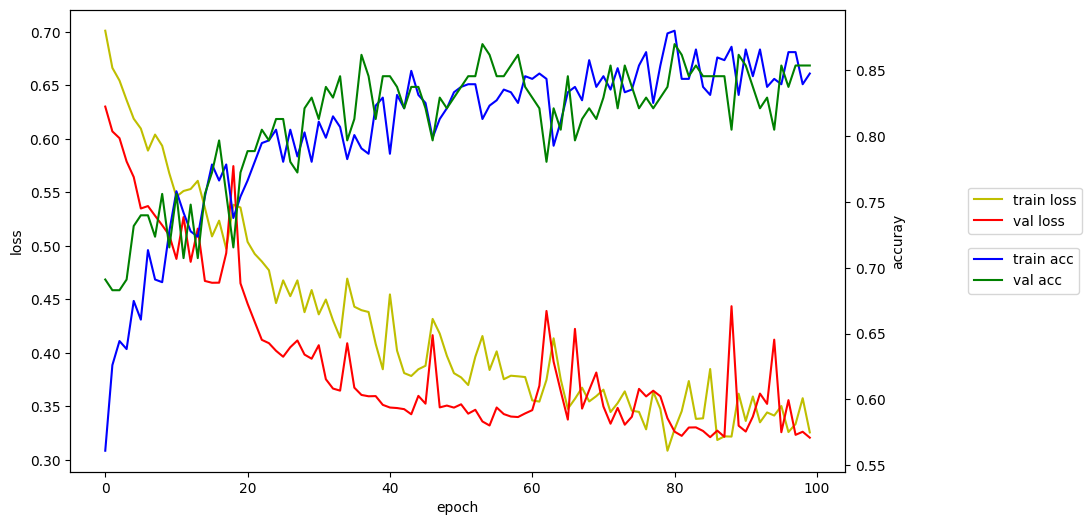

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,6))
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5))
loss_ax.legend(loc='lower left', bbox_to_anchor=(1.15, 0.5))

plt.show()

# COVID-19 face mask detector in real-time video streams with OpenCV

In [65]:
# 다시 캠 실행시 여기서부터 다시시작
import cv2
import numpy as np
from keras.models import load_model

labels_dict={1:'with_mask', 0:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [66]:
#video stream source : webcam or recorded video 

source=cv2.VideoCapture(0)
# cap = cv2.VideoCapture('test_mask.mp4')

In [67]:
# video output

fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter('output.avi', fourcc, 20, (640,480))             # 비디오 output.avi 확인

In [68]:
# warning sound in case of without_mask

import pygame, sys
from pygame import mixer

pygame.init()
pygame.mixer.init()

sound = mixer.Sound('alarm.wav')

In [69]:
# face recognition/classifier : haar feature
face_clsfr=cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')

# face mask detector
model = load_model('100-0.3208.model')       #가장 마지막으로 만들어진 모델  # 가장성능좋은모델

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        
        if(labels_dict[label] == 'with_mask'):
            print("No Beep")
        else:
            sound.play()
            print("Beep")   
        
        cv2.putText(
          img, "{}: {:.2f}%".format(labels_dict[label], np.max(result) * 100),            
          (x, y-10),
          cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    out.write(img)

    if cv2.waitKey(1) & 0xFF == ord('q'):       # 종료하려면 q 
        break

source.release()
out.release()

cv2.destroyAllWindows()

1/1 [==============================] - 0s 116ms/step
Beep
1/1 [==============================] - 0s 43ms/step
Beep
1/1 [==============================] - 0s 44ms/step
Beep
1/1 [==============================] - 0s 45ms/step
Beep
1/1 [==============================] - 0s 42ms/step
Beep
1/1 [==============================] - 0s 40ms/step
Beep
1/1 [==============================] - 0s 42ms/step
Beep
1/1 [==============================] - 0s 42ms/step
Beep
1/1 [==============================] - 0s 49ms/step
Beep
1/1 [==============================] - 0s 47ms/step
Beep
1/1 [==============================] - 0s 46ms/step
Beep
1/1 [==============================] - 0s 43ms/step
Beep
1/1 [==============================] - 0s 61ms/step
Beep
1/1 [==============================] - 0s 56ms/step
Beep
1/1 [==============================] - 0s 56ms/step
Beep
1/1 [==============================] - 0s 52ms/step
Beep
1/1 [==============================] - 0s 56ms/step
Beep
1/1 [=========================

1/1 [==============================] - 0s 39ms/step
No Beep
1/1 [==============================] - 0s 46ms/step
No Beep
1/1 [==============================] - 0s 44ms/step
No Beep
1/1 [==============================] - 0s 40ms/step
Beep
1/1 [==============================] - 0s 41ms/step
Beep
1/1 [==============================] - 0s 40ms/step
No Beep
1/1 [==============================] - 0s 43ms/step
No Beep
1/1 [==============================] - 0s 39ms/step
No Beep
1/1 [==============================] - 0s 40ms/step
No Beep
1/1 [==============================] - 0s 44ms/step
No Beep
1/1 [==============================] - 0s 40ms/step
No Beep
1/1 [==============================] - 0s 42ms/step
No Beep
1/1 [==============================] - 0s 41ms/step
No Beep
1/1 [==============================] - 0s 42ms/step
No Beep
1/1 [==============================] - 0s 44ms/step
No Beep
1/1 [==============================] - 0s 47ms/step
No Beep
1/1 [==============================] - 0s 46ms

#### Example : capturing a video

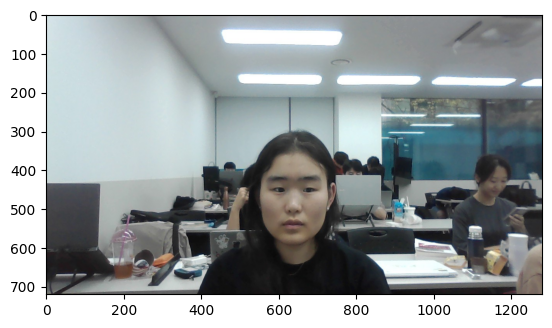

In [70]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#img = cv2.imread('../capture_result.png')
img = cv2.imread('../data/capture_result.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)